In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error

In [5]:
df = pd.read_csv('data/Train.csv')


df.head()


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [4]:
print(df.shape)
df.describe()

(4809, 23)


,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [6]:
for i in df.columns:
    print(df[i].value_counts())  

ID
tour_0       1
tour_4888    1
tour_4886    1
tour_4885    1
tour_4884    1
            ..
tour_2970    1
tour_297     1
tour_2969    1
tour_2968    1
tour_999     1
Name: count, Length: 4809, dtype: int64
country
UNITED STATES OF AMERICA    695
UNITED KINGDOM              533
ITALY                       393
FRANCE                      280
ZIMBABWE                    274
                           ... 
NIGER                         1
MYANMAR                       1
DOMINICA                      1
TUNISIA                       1
ESTONIA                       1
Name: count, Length: 105, dtype: int64
age_group
25-44    2487
45-64    1391
1-24      624
65+       307
Name: count, dtype: int64
travel_with
Alone                  1265
Spouse                 1005
Friends/Relatives       895
Spouse and Children     368
Children                162
Name: count, dtype: int64
total_female
1.0     2418
0.0     1669
2.0      463
3.0      144
4.0       46
5.0       25
6.0       15
7.0       10
10.0  

In [7]:
df.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [15]:
X = df.drop(columns = ['total_cost'])
y = df['total_cost']
Xtrain1, Xtrain2, ytrain1, ytrain2 = train_test_split(X, y, test_size = 0.2, stratify=y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [9]:
print(Xtrain1.head())
print(Xtrain2.head())
print(ytrain1.head())

             ID   country age_group          travel_with  total_female   
3610  tour_5375  ZIMBABWE     25-44                Alone           0.0  \
280   tour_1349     SPAIN     25-44  Spouse and Children           3.0   
4036  tour_5897     ITALY     25-44    Friends/Relatives           1.0   
3863  tour_5688  ZIMBABWE      1-24                Alone           0.0   
4321  tour_6230    ZAMBIA     25-44    Friends/Relatives           0.0   

      total_male               purpose     main_activity   
3610         1.0                 Other   Hunting tourism  \
280          1.0  Leisure and Holidays  Wildlife tourism   
4036         2.0  Leisure and Holidays     Beach tourism   
3863         1.0              Business   Hunting tourism   
4321         2.0              Business     Bird watching   

                       info_source tour_arrangement  ... package_food   
3610            Friends, relatives      Independent  ...           No  \
280   Travel, agent, tour operator     Package T

<Axes: >

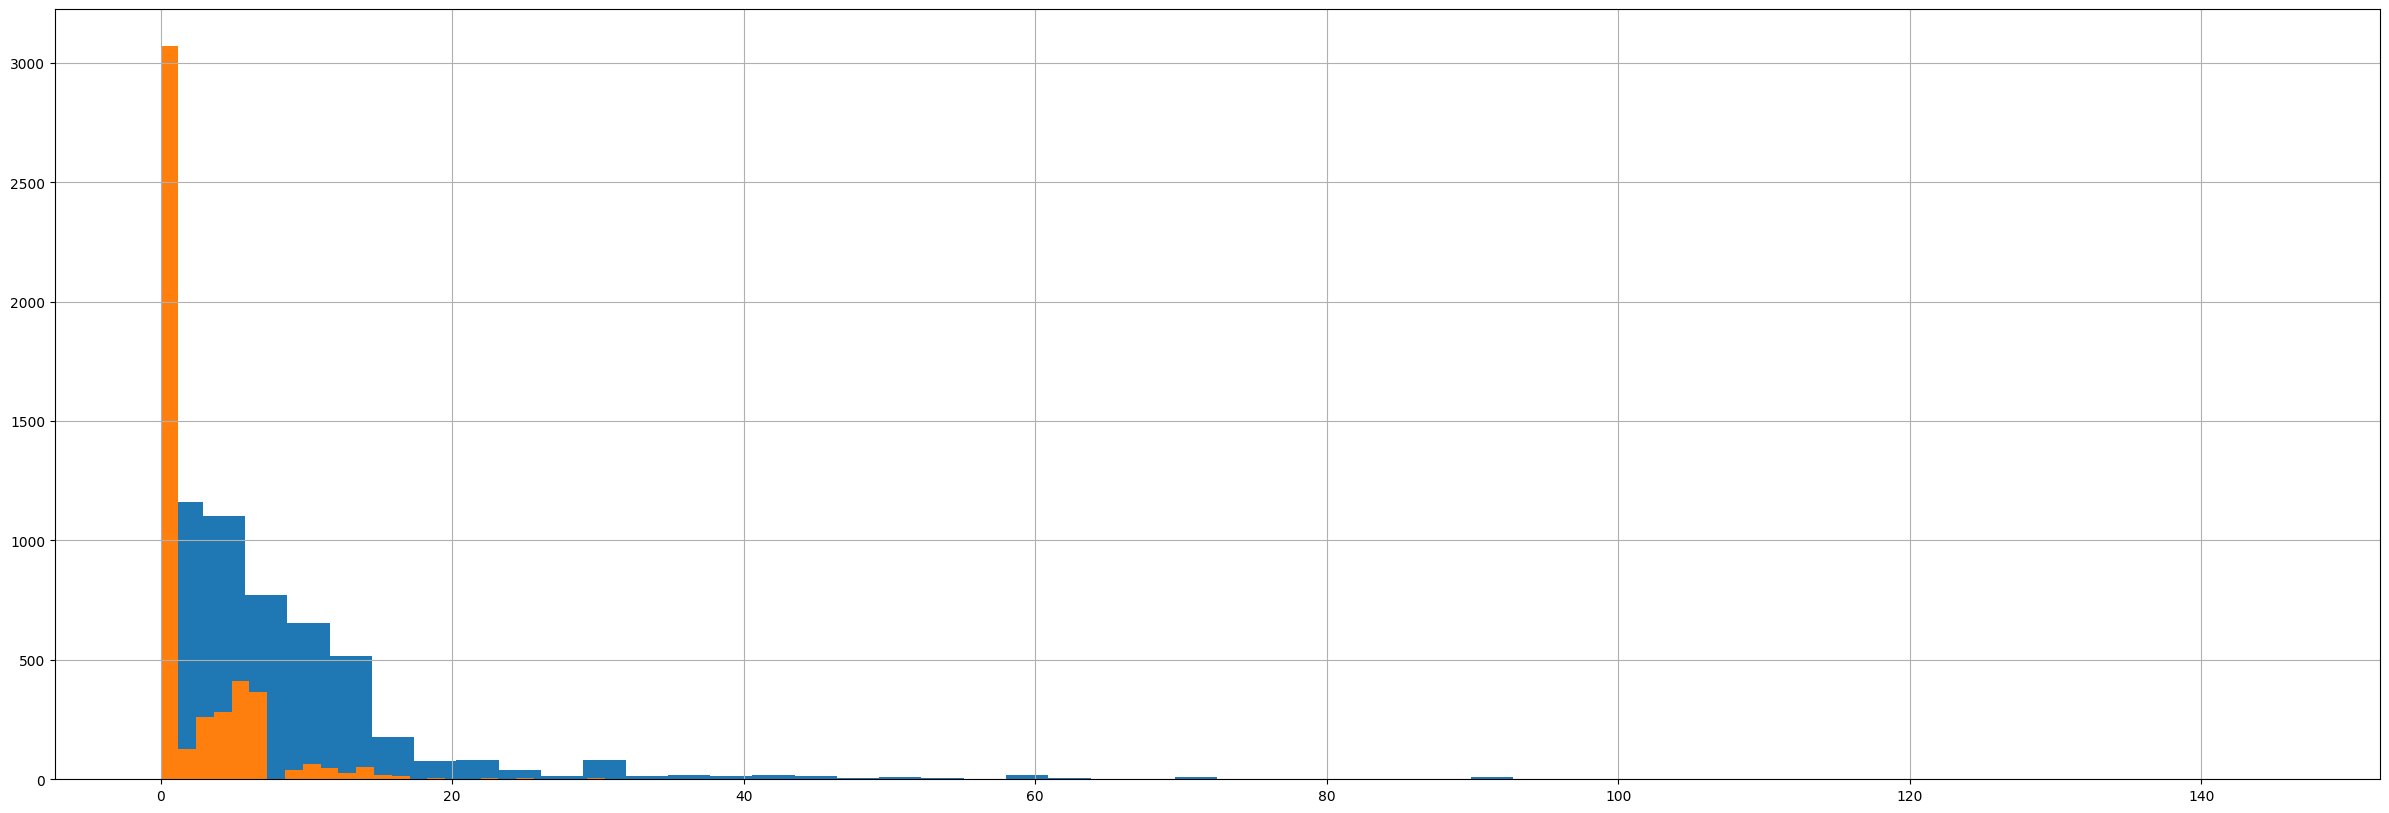

In [27]:
#f.hist(bins=30)
plt.figure(figsize=(30,10))
df['night_mainland'].hist(bins=50)
df['night_zanzibar'].hist(bins=50)

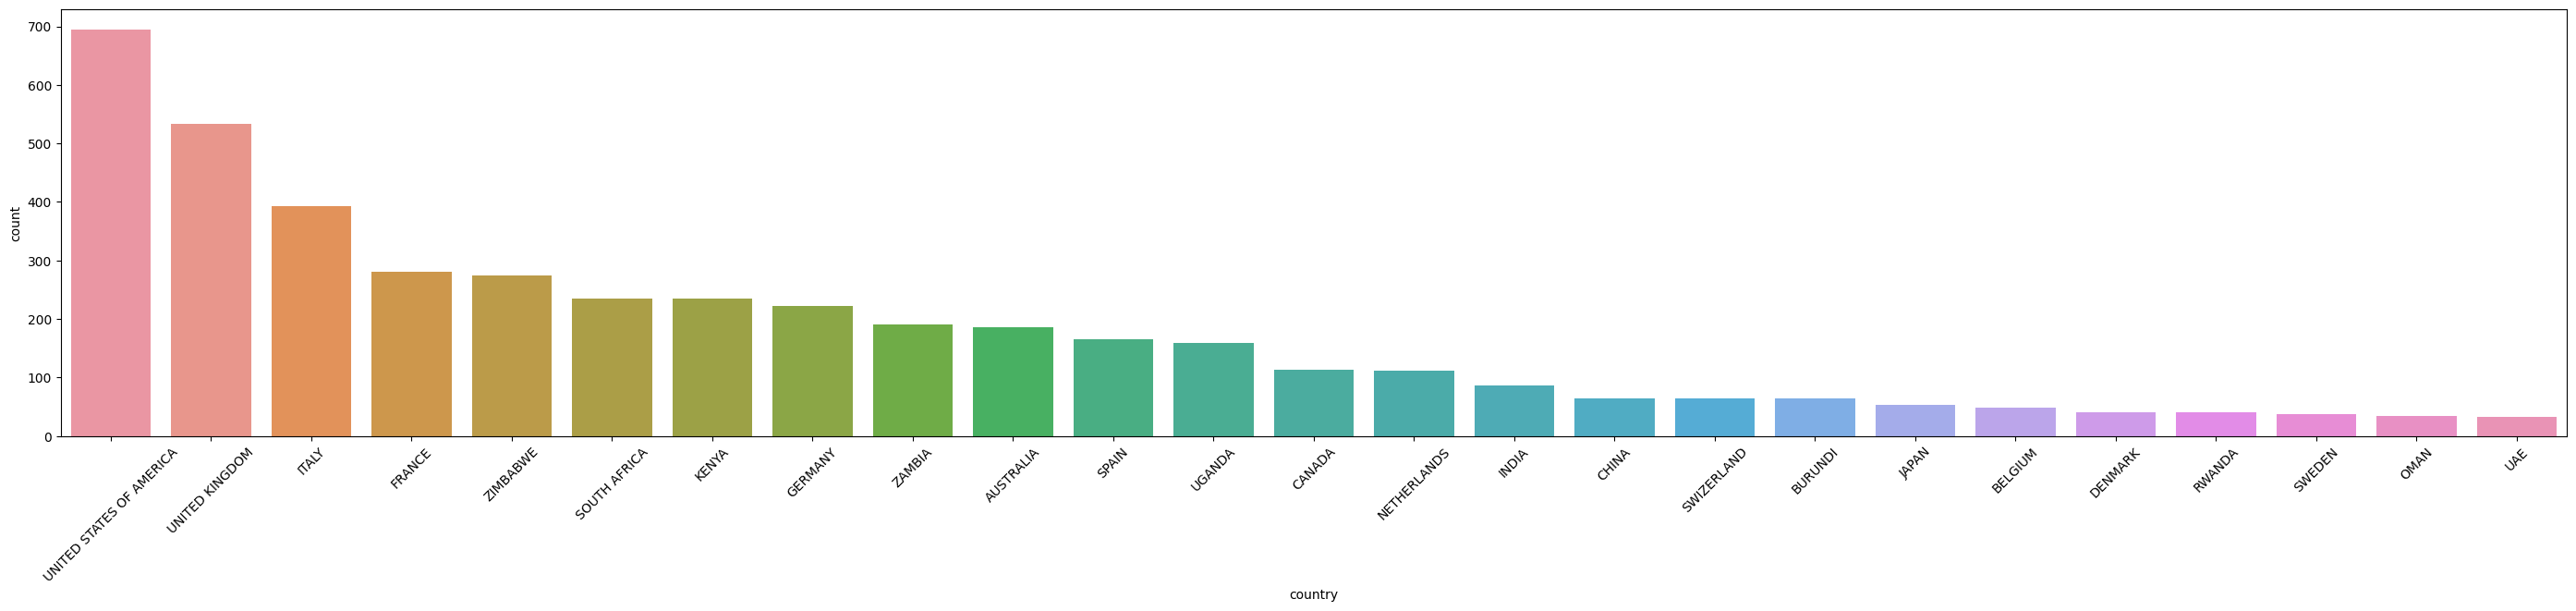

In [21]:
count_countries = df['country'].value_counts().reset_index()
count_countries.columns = ['country', 'count']
sorted_countries = count_countries.sort_values(by='count', ascending=False).head(25)

plt.figure(figsize=(35, 6))
sns.countplot(x="country", data=df, order=sorted_countries['country'])
plt.xticks(rotation=45)
plt.show()

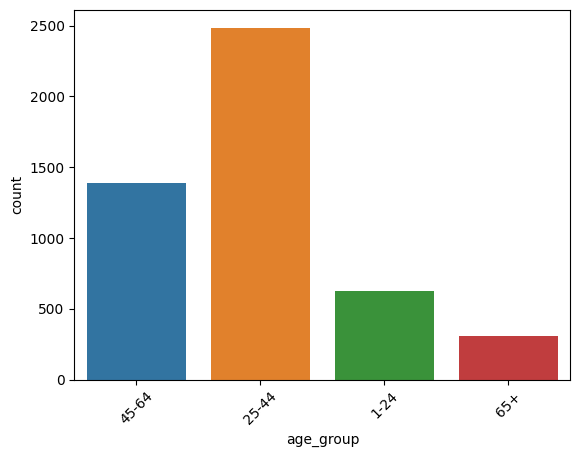

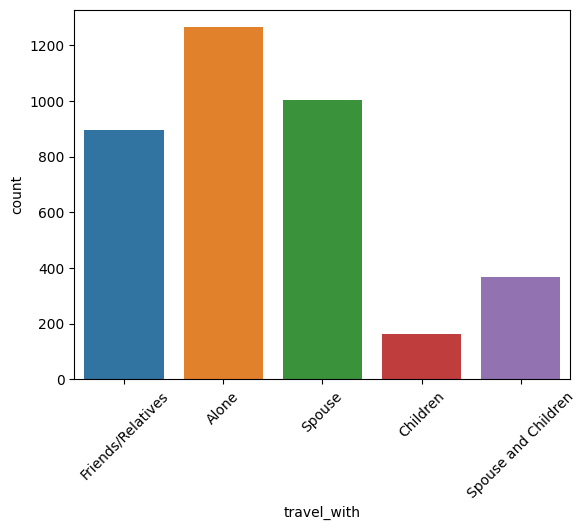

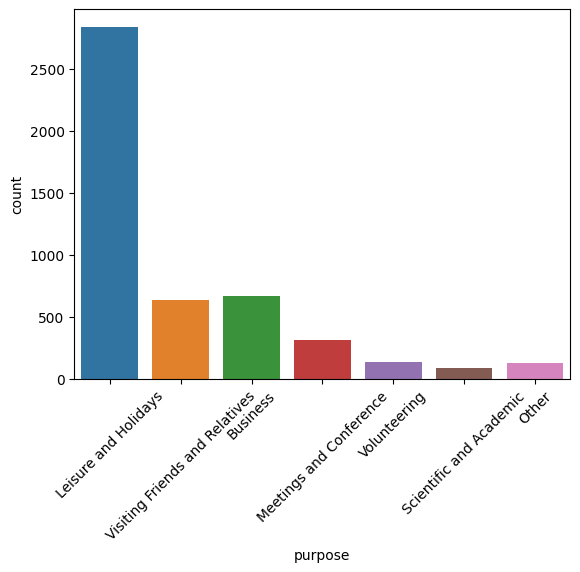

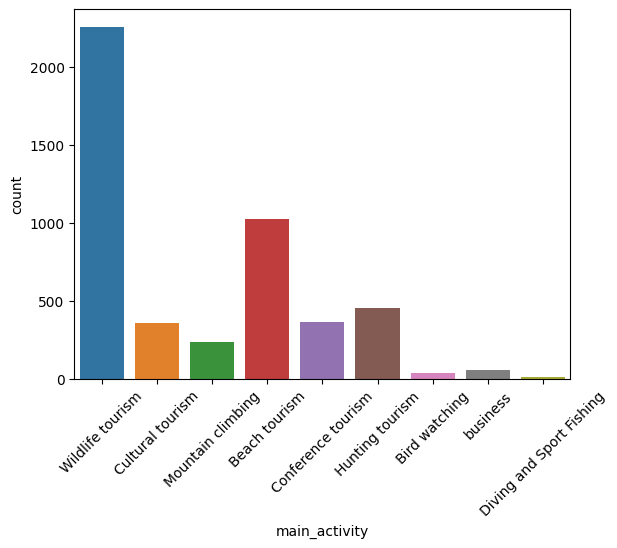

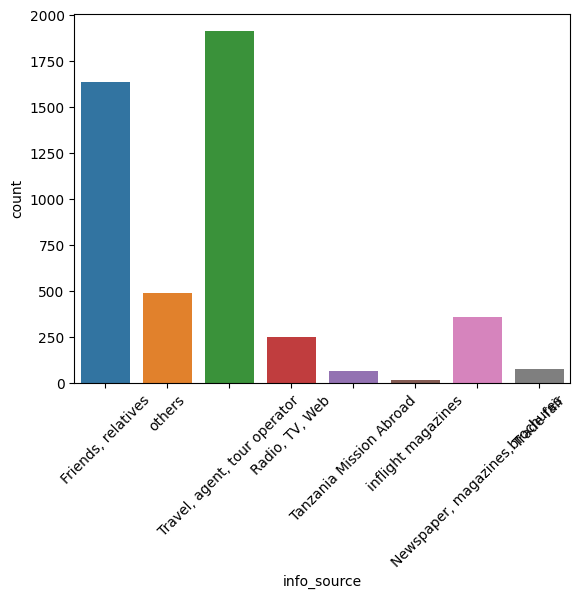

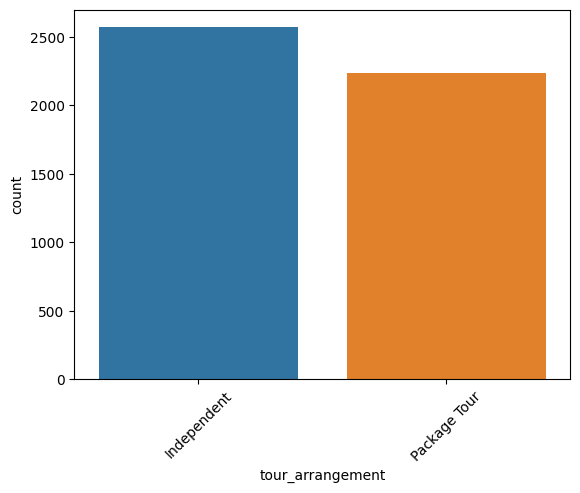

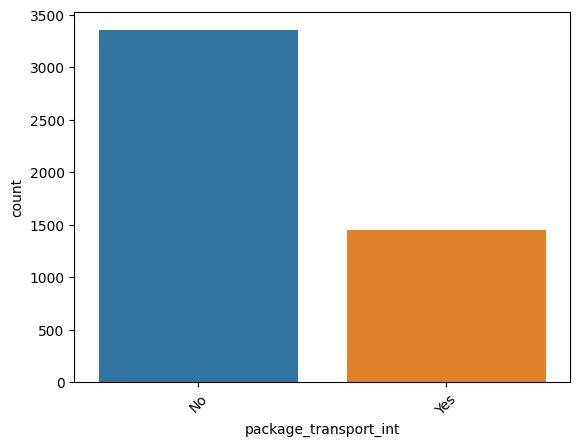

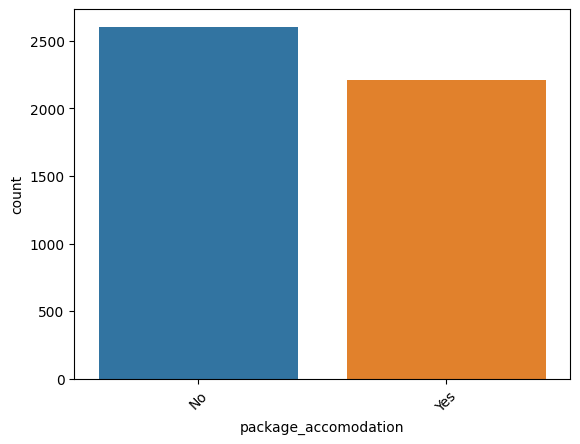

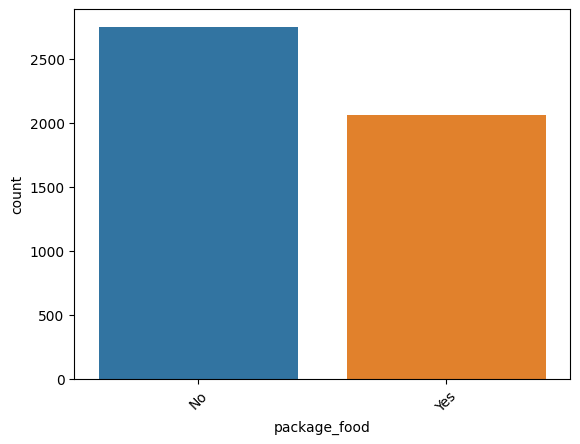

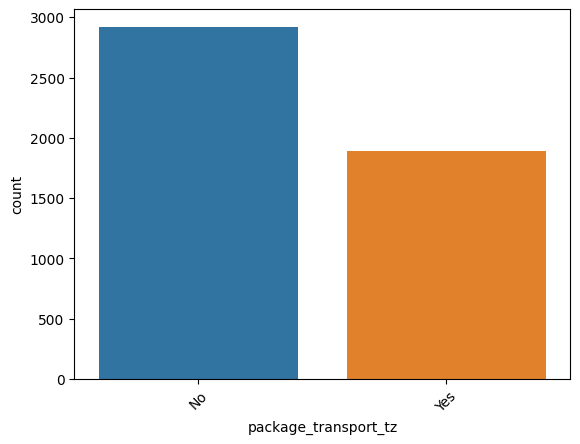

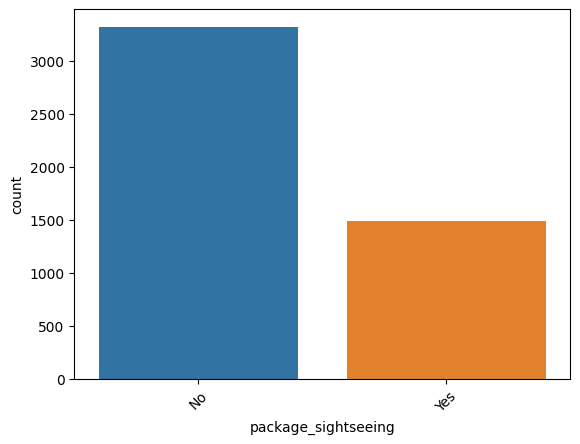

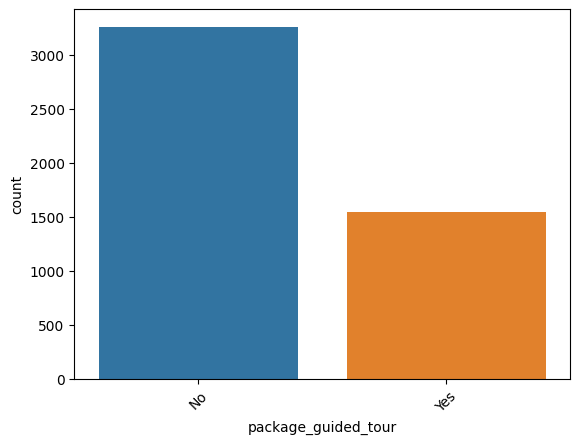

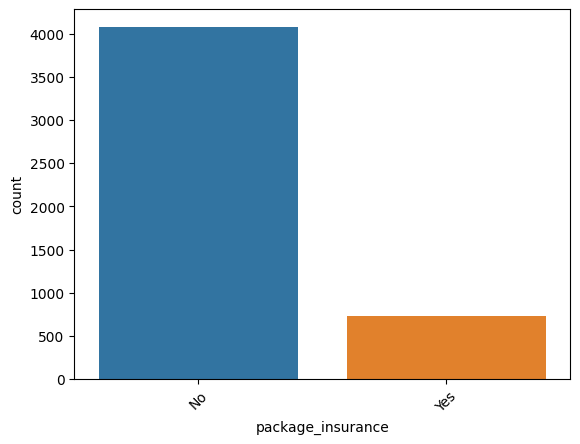

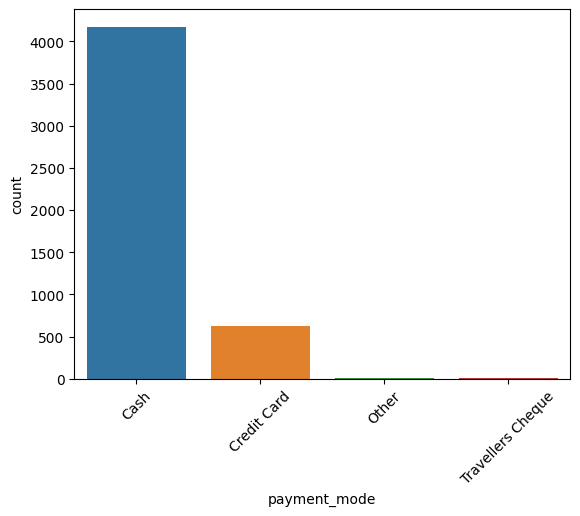

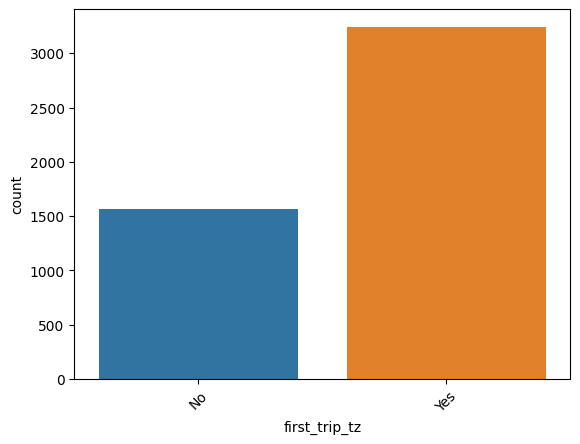

In [22]:
#df.columns
categorical_columns = [ 'age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'payment_mode', 'first_trip_tz']

for column in categorical_columns:
    #plt.figure(figsize=(35, 6))
    sns.countplot(data=df, x=column, order=categorical_columns)
    plt.xticks(rotation=45)
    plt.show()